In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
x_qual=np.arange(0,11,1)
x_serv=np.arange(0,11,1)
x_tip=np.arange(0,26,1)

In [3]:
qual_lo=fuzz.trimf(x_qual,[0,0,5])
qual_md=fuzz.trimf(x_qual,[0,5,10])
qual_hi=fuzz.trimf(x_qual,[5,10,10])

In [4]:
serv_lo=fuzz.trimf(x_serv,[0,0,5])
serv_md=fuzz.trimf(x_serv,[0,5,10])
serv_hi=fuzz.trimf(x_serv,[5,10,10])

In [5]:
tip_lo=fuzz.trimf(x_tip,[0,0,13])
tip_md=fuzz.trimf(x_tip,[0,13,25])
tip_hi=fuzz.trimf(x_tip,[13,25,25])

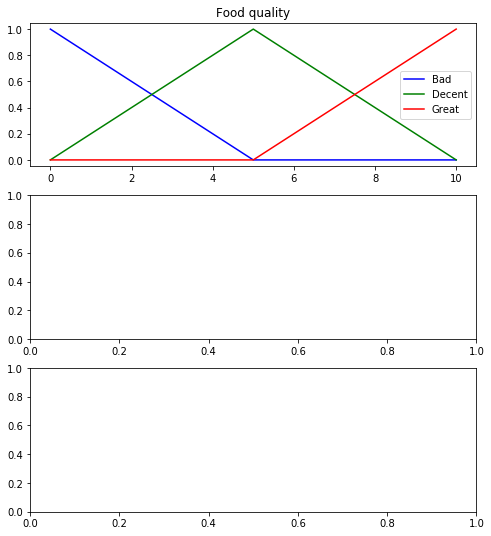

In [14]:
fig,(ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(8,9))
ax0.plot(x_qual,qual_lo,'b',linewidth=1.5,label='Bad')
ax0.plot(x_qual,qual_md,'g',linewidth=1.5,label='Decent')
ax0.plot(x_qual,qual_hi,'r',linewidth=1.5,label='Great')
ax0.set_title('Food quality')
ax0.legend()

# ax1.plot(x_serv,serv_lo,'b',linewidth=1.5,label='Poor')
# ax1.plot(x_serv,serv_md,'g',linewidth=1.5,label='Acceptable')
# ax1.plot(x_serv,serv_hi,'r',linewidth=1.5,label='Amazing')
# ax1.set_title('Service quality')
# ax1.legend()

# ax2.plot(x_tip,tip_lo,'b',linewidth=1.5,label='Low')
# ax2.plot(x_tip,tip_md,'g',linewidth=1.5,label='Medium')
# ax2.plot(x_tip,tip_hi,'r',linewidth=1.5,label='High')
# ax2.set_title('Tip amount')
# ax2.legend()

# for ax in (ax0,ax1,ax2):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)



In [84]:
qual_lo

array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

In [85]:
qual_level_lo=fuzz.interp_membership(x_qual,qual_lo,4)
qual_level_md=fuzz.interp_membership(x_qual,qual_md,4)
qual_level_hi=fuzz.interp_membership(x_qual,qual_hi,4)

serv_level_lo=fuzz.interp_membership(x_serv,serv_lo,8.5)
serv_level_md=fuzz.interp_membership(x_serv,serv_md,8.5)
serv_level_hi=fuzz.interp_membership(x_serv,serv_hi,8.5)



In [86]:
active_rule1=np.fmax(qual_level_lo,serv_level_lo)

In [87]:
tip_activation_lo=np.fmin(active_rule1,tip_lo)

In [88]:
tip_activation_md=np.fmin(serv_level_md,tip_md)

In [89]:
active_rule3=np.fmax(qual_level_hi,serv_level_hi)

In [90]:
tip_activation_hi=np.fmin(active_rule3,tip_hi)

In [91]:
#tip0=np.zeros_like(x_tip)

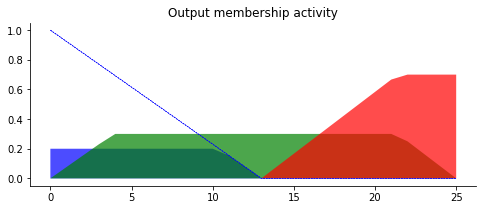

In [92]:
fig,ax0=plt.subplots(figsize=(8,3))

ax0.fill_between(x_tip,tip0,tip_activation_lo,facecolor='b',alpha=0.7)
ax0.plot(x_tip,tip_lo,'b',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_tip,tip0,tip_activation_md,facecolor='g',alpha=0.7)
ax0.plot(x_tip,tip_lo,'b',linewidth=0.5,linestyle='--',)
ax0.fill_between(x_tip,tip0,tip_activation_hi,facecolor='r',alpha=0.7)
ax0.plot(x_tip,tip_lo,'b',linewidth=0.5,linestyle='--',)
ax0.set_title('Output membership activity')
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [93]:
aggregated=np.fmax(tip_activation_lo,np.fmax(tip_activation_md,tip_activation_hi))

In [94]:
tip=fuzz.defuzz(x_tip,aggregated,'centroid')

In [95]:
tip

15.196306704134889

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Using TensorFlow backend.


17465344/17464789 [==============================] - 5s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_____

In [2]:
test_x.shape

(10000, 10000)

In [3]:
train_x.shape

(40000, 10000)

In [8]:
test_x.shape

(10000, 10000)

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

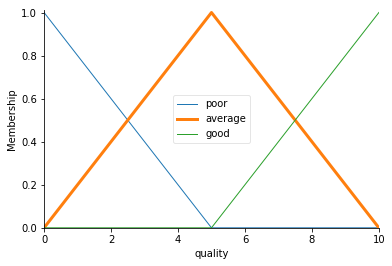

In [10]:
# You can see how these look with .view()
quality['average'].view()

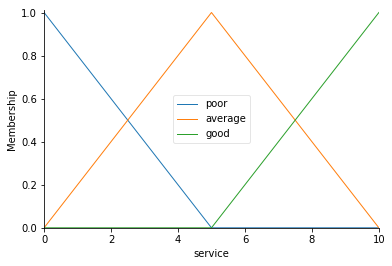

In [11]:
service.view()

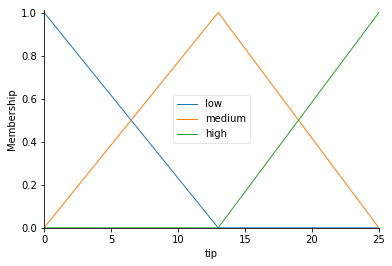

In [12]:
tip.view()

In [13]:
rule1 = ctrl.Rule(quality | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

TypeError: unsupported operand type(s) for |: 'Antecedent' and 'Term'

In [11]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [15]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


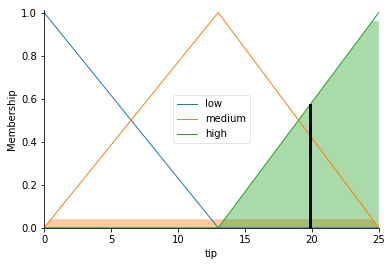

In [17]:
print(tipping.output['tip'])
tip.view(sim=tipping)

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

age = ctrl.Antecedent(np.arange(0, 100, 1), 'age')
height = ctrl.Consequent(np.arange(0, 95, 1), 'height')

# Fuzzy
age['low'] = fuzz.trimf(age.universe, [2, 4, 8])
height['small'] = fuzz.trimf(height.universe, [15, 30, 35])

age.view()
height.view()

# Define a rule
rule1 = ctrl.Rule(age['low'], height['small'])

control = ctrl.ControlSystem([rule1])
control_simulation = ctrl.ControlSystemSimulation(control)
control_simulation.input['age'] = 5
control_simulation.compute()
height.view(sim=control_simulation)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [16]:
print(control_simulation.output['height'])


26.500000000000004


In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])



tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()


print(tipping.output['tip'])



19.847607361963192


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])



tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()


print(tipping.output['tip'])